In [ ]:
!pip install pycaret
!pip install pandas
!pip install joblib

In [1]:
import pandas as pd
import joblib as jl

In [3]:
train=pd.read_csv('C:/Users/admin/Desktop/통신/Q2/data/Q2_train_최종.csv')

In [4]:
#데이터 자동 전처리(minmax scaling)와 파이프라인 생성
from pycaret.classification import *

clf = setup(data=train,
            target='root_cause_type',
            normalize = True,
            normalize_method = 'minmax',
            fold=4,
            fold_shuffle=True,
            session_id=23)

,Description,Value
0,Session id,23
1,Target,root_cause_type
2,Target type,Multiclass
3,Original data shape,"(1114, 9)"
4,Transformed data shape,"(1114, 9)"
5,Transformed train set shape,"(779, 9)"
6,Transformed test set shape,"(335, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [5]:
#accuracy 기준으로 알고리즘 자동 비교
best = compare_models(sort='acc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9949,0.9995,0.9949,0.9949,0.9949,0.9917,0.9917,0.1625
rf,Random Forest Classifier,0.9923,0.9998,0.9923,0.9924,0.9923,0.9875,0.9876,0.1725
gbc,Gradient Boosting Classifier,0.9923,0.9998,0.9923,0.9925,0.9923,0.9875,0.9876,0.1825
et,Extra Trees Classifier,0.9897,0.9998,0.9897,0.9900,0.9897,0.9833,0.9835,0.1775
lightgbm,Light Gradient Boosting Machine,0.9897,0.9998,0.9897,0.9900,0.9898,0.9834,0.9835,0.1725
dt,Decision Tree Classifier,0.9884,0.9900,0.9884,0.9886,0.9884,0.9812,0.9813,0.1400
svm,SVM - Linear Kernel,0.9731,0.0000,0.9731,0.9742,0.9732,0.9564,0.9567,0.1450
ada,Ada Boost Classifier,0.9653,0.9894,0.9653,0.9669,0.9643,0.9428,0.9443,0.1700
knn,K Neighbors Classifier,0.9615,0.9907,0.9615,0.9620,0.9613,0.9373,0.9378,0.5200
lda,Linear Discriminant Analysis,0.9423,0.9933,0.9423,0.9432,0.9405,0.9044,0.9065,0.1425


In [6]:
#best 모델로 튜닝
tuned_clf = tune_model(best, optimize='acc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9846,0.9998,0.9846,0.9848,0.9846,0.9750,0.9751
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9845,0.9986,0.9845,0.9847,0.9844,0.9748,0.9750
Mean,0.9923,0.9996,0.9923,0.9924,0.9923,0.9875,0.9875
Std,0.0077,0.0006,0.0077,0.0076,0.0077,0.0125,0.0125


Fitting 4 folds for each of 10 candidates, totalling 40 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


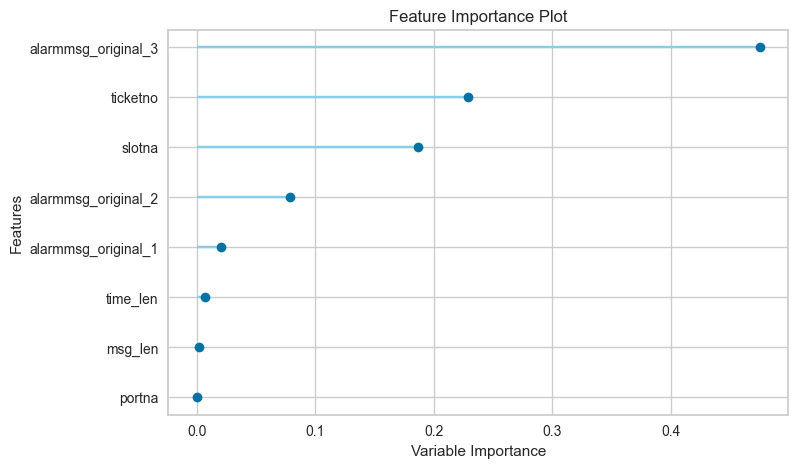

In [7]:
#feature importance 확인
plot_model(best, plot='feature')

In [ ]:
#모델 저장
jl.dump(best,'Q2_xgb.pkl')